# Debiasing Facial Recognition Systems

In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
import mitdeeplearning as mdl
import matplotlib.pyplot as plt
from tqdm import tqdm
import functools

In [4]:
path_train = tf.keras.utils.get_file('train_face.h5', 'https://www.dropbox.com/s/hlz8atheyozp1yx/train_face.h5?dl=1')
loader = mdl.lab2.TrainingDatasetLoader(path_train)

1262288896/Unknown - 207s 0us/stepOpening C:\Users\aadig\.keras\datasets\train_face.h5
Loading data into memory...


In [5]:
number_of_training_examples = loader.get_train_size()
(images, labels) = loader.get_batch(100)

## Step 1: Create a baseline model with CNNs to identify potentially biased model

Examine the datasets to see sample datapoints

In [7]:
from ipywidgets import interact

face_images = images[np.where(labels == 1)[0]]
not_face_images = images[np.where(labels == 0)[0]]

@interact(idx_face = (0,50))
def plt1(idx_face):
    plt.figure(figsize=(5,5))
    plt.subplot(1,2,1)
    plt.imshow(face_images[idx_face])
    plt.title("Face")
    plt.grid(False)

@interact(not_idx_face = (0,50))
def plt2(not_idx_face):
    plt.subplot(1,2,2)
    plt.imshow(not_face_images[not_idx_face])
    plt.title("Not face")
    plt.grid(False)


interactive(children=(IntSlider(value=25, description='idx_face', max=50), Output()), _dom_classes=('widget-in…

interactive(children=(IntSlider(value=25, description='not_idx_face', max=50), Output()), _dom_classes=('widge…

In [10]:
n_filter = 12

def base_classifier(n_outputs = 1):
    Conv2D = functools.partial(tf.keras.layers.Conv2D, padding = 'same', activation = 'relu')

    BatchNormalization = tf.keras.layers.BatchNormalization
    Flatten = tf.keras.layers.Flatten
    Dense = functools.partial(tf.keras.layers.Dense, activation = 'relu')

    model = tf.keras.Sequential([
        Conv2D(filters = 1*n_filter, kernel_size=5, strides = 2),
        BatchNormalization(),

        Conv2D(filters = 2*n_filter, kernel_size=5, strides = 2),
        BatchNormalization(),

        Conv2D(filters = 4*n_filter, kernel_size=5, strides = 2),
        BatchNormalization(),

        Conv2D(filters = 6*n_filter, kernel_size=5, strides = 2),
        BatchNormalization(),

        Flatten(),
        Dense(512),
        Dense(n_outputs, activation = None)
    ])
    return model

base_classifier = base_classifier()

### Test this classifier 

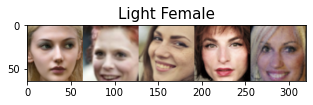

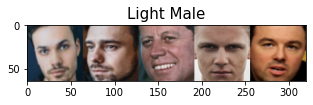

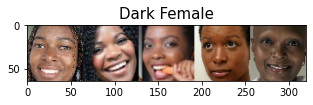

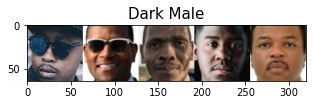

In [12]:
test_faces = mdl.lab2.get_test_faces()
keys = ["Light Female", "Light Male", "Dark Female", "Dark Male"]
for group, key in zip(test_faces,keys): 
  plt.figure(figsize=(5,5))
  plt.imshow(np.hstack(group))
  plt.title(key, fontsize=15)

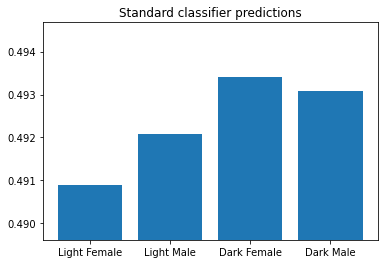

In [14]:
standard_classifier_logits = [base_classifier(np.array(x, dtype=np.float32)) for x in test_faces]
standard_classifier_probs = tf.squeeze(tf.sigmoid(standard_classifier_logits))

# Plot the prediction accuracies per demographic
xx = range(len(keys))
yy = standard_classifier_probs.numpy().mean(1)
plt.bar(xx, yy)
plt.xticks(xx, keys)
plt.ylim(max(0,yy.min()-yy.ptp()/2.), yy.max()+yy.ptp()/2.)
plt.title("Standard classifier predictions");